In [4]:
plt.rcParams['font.family'] = 'NanumGothic'
import warnings
warnings.simplefilter('ignore')

# StatsModels 로지스틱 회귀

- 가상 데이터 분포

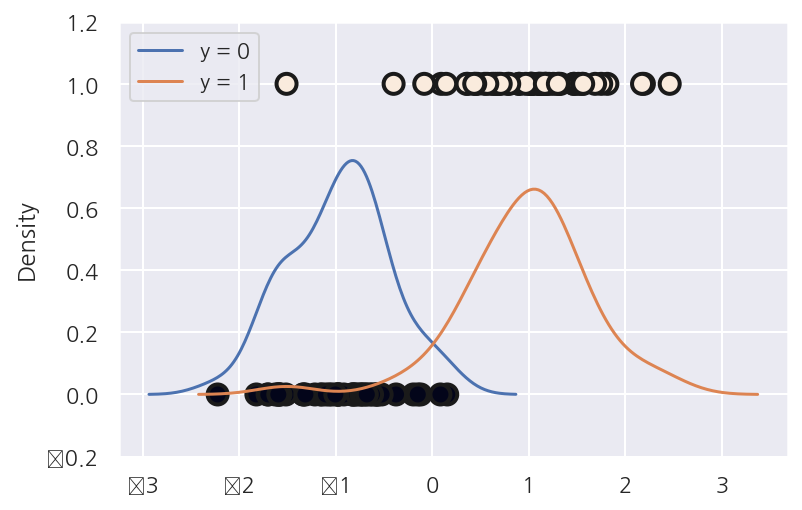

In [5]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, s=100, edgecolor='k', c=y, linewidth=2)
sns.distplot(X0[y == 0, :], label='y = 0', hist=False)
sns.distplot(X0[y == 1, :], label='y = 1', hist=False)
plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()

- threshold 설정 후, x값을 보고 y를 예측

In [6]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y,X)
logit_res = logit_mod.fit(disp=0) 
# 수치적 optimization을 하므로, 몇 번해서 수렴할 지 알 수가 없음
# optimization process를 display할 지 보여주는 인수 설정
# disp=0 / disp=1 (보여주기)

logit_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                      100
Method:                           MLE   Df Model:                           -1
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:                  0.7679
Time:                        13:13:09   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006
==============================================================================
"""

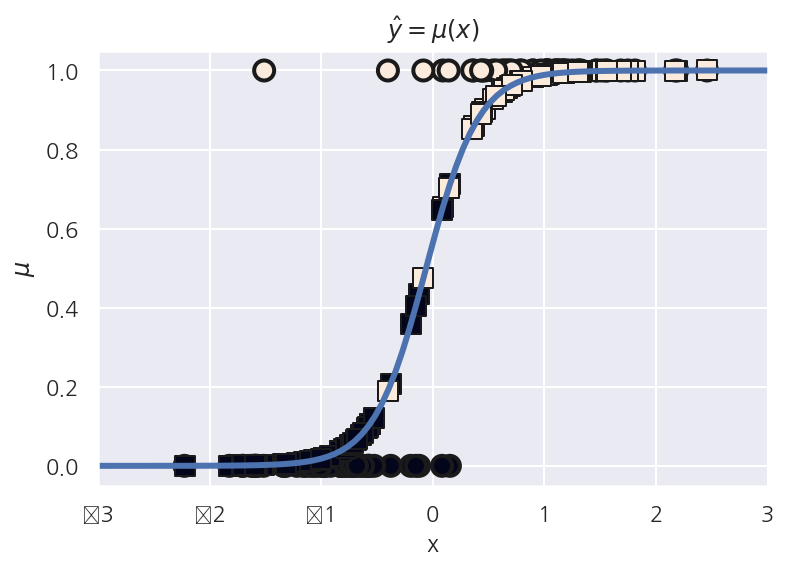

In [8]:
xx = np.linspace(-3,3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor='k', lw=2)
plt.scatter(X0, logit_res.predict(X), marker='s', c=y, 
           s=100, edgecolor='k', lw=1)
plt.xlim(-3, 3)
plt.ylabel(r"$\mu$")
plt.xlabel('x')
plt.title(r"$\hat{y} = \mu(x)$")
plt.show()

## Decision Function

- logit 모형의 결과 객체에는 fittedvalues라는 속성으로, 판별함수 $ z = w^Tx $ 값이 들어가 있다.

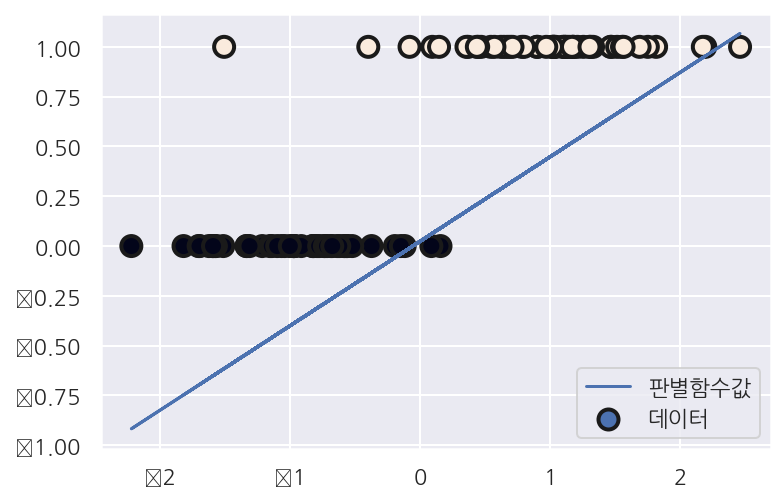

In [11]:
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2, label="데이터")
plt.plot(X0, logit_res.fittedvalues * 0.1, label="판별함수값")
plt.legend()
plt.show()

## 로지스틱 회귀 성능 측정

In [12]:
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False) 
# normalize=False로 놓으면 이탈도와 같은 값을 구한다.

16.084355200413036

In [18]:
print('y 클래스', np.unique(y))
mu_null = np.sum(y) / len(y)
mu_null

y 클래스 [0 1]


0.51

In [23]:
print(np.ones_like(y), print(y), sep='\n')
# given array를 모두 1로 바꿔서 줌
len(np.ones_like(y)), len(y)

[0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0
 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
None


(100, 100)

In [26]:
# null model은 어떤 x가 와도 일정한 mu값을 줌.
y_null = np.ones_like(y) * mu_null
y_null

array([0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
       0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
       0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
       0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
       0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
       0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
       0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
       0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
       0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
       0.51])

In [28]:
log_loss(y, y_null, normalize=False)

69.29471672244784

In [29]:
# 맥파든 의사 결정계수
1 - (log_loss(y, y_hat, normalize=False) / log_loss(y, y_null , normalize=False))

0.7678848264170398

# Scikit-Learn 패키지의 로지스틱 회귀

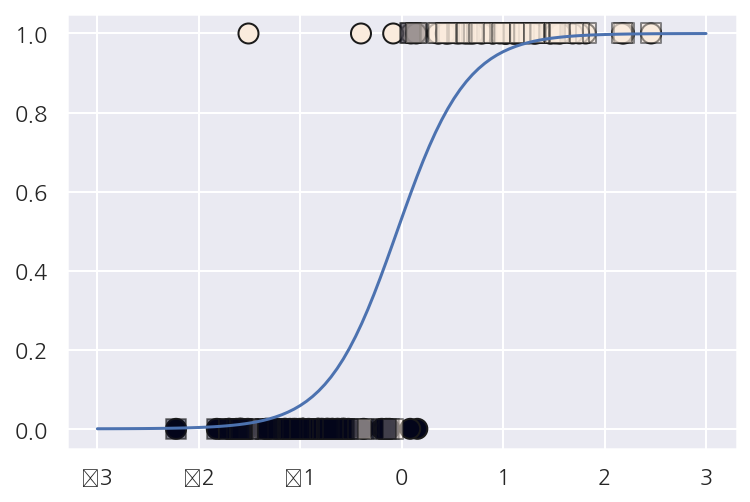

In [46]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0, y)
xx = np.linspace(-3, 3, 100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))
plt.plot(xx, mu)
plt.scatter(X0, y, c=y, s=100, edgecolor='k', lw=1)
plt.scatter(X0, model_sk.predict(X0), c=y, s=100, edgecolor='k', lw=1, marker='s'
           ,alpha=0.5)
plt.show()

## 연습문제

1. 붓꽃 분류문제에서 클래스가 세토사와 베르시칼라 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 이 보고서에서 어떤 값이 세토사와 베르시칼라를 구분하는 기준값(threshold)으로 사용되고 있는가?

2. 위 결과를 분류결과표(confusion matrix)와 분류결과보고서(classification report)로 나타내라.

3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

In [76]:
from sklearn.datasets import load_iris
iris = load_iris()
X0 = pd.DataFrame(iris.data, columns=iris.feature_names).iloc[:,0]
y = pd.Series(iris.target, dtype='category')

In [77]:
X0 = X0[y.isin([0,1])]

In [78]:
y = y[y.isin([0,1])]

In [83]:
X = sm.add_constant(X0)
logit_model = sm.Logit(y, X)
logit_res = logit_model.fit()

logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:                  0.5368
Time:                        14:28:44   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal length (cm)     5.1403      1.007      5.107      0.000       3.168       7.113
=====================================================================================
"""

In [91]:
logit_res.params

const               -27.831451
sepal length (cm)     5.140336
dtype: float64

In [100]:
threshold = -np.linalg.solve([[logit_res.params[1]]], [[logit_res.params[0]]])
threshold

array([[5.4143251]])

In [114]:
result = pd.DataFrame(np.vstack([logit_res.fittedvalues, y]).T, columns=['decision_function','y_true'])
result['y_hat'] = result['decision_function'].apply(lambda x:0 if x <= 0 else 1)

In [115]:
result

,decision_function,y_true,y_hat
0,-1.615737,0.0,0
1,-2.643804,0.0,0
2,-3.671871,0.0,0
3,-4.185905,0.0,0
4,-2.129770,0.0,0
...,...,...,...
95,1.468465,1.0,1
96,1.468465,1.0,1
97,4.038633,1.0,1
98,-1.615737,1.0,0


In [101]:
from sklearn.metrics import confusion_matrix, classification_report

In [116]:
confusion_matrix(result['y_true'], result['y_hat'] )

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [118]:
print(classification_report(result['y_true'], result['y_hat'] ))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        50
         1.0       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [119]:
from sklearn.metrics import roc_curve

In [124]:
fpr, tpr, thresholds = roc_curve(result.y_true, result.decision_function)

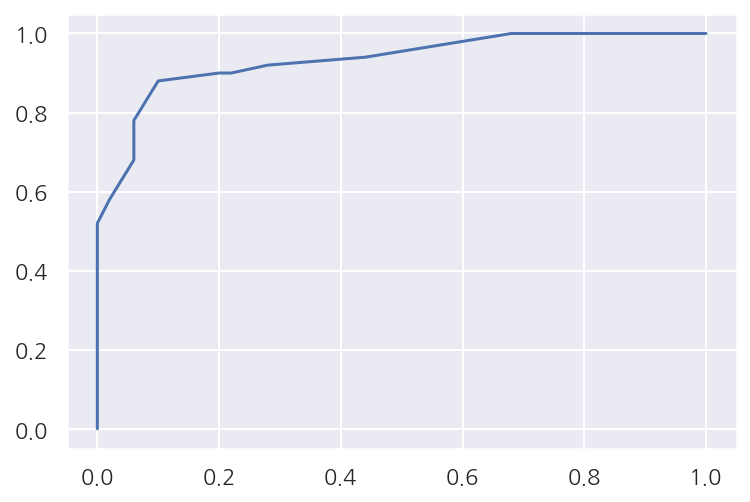

In [125]:
plt.plot(fpr, tpr)
plt.show()

In [129]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9326

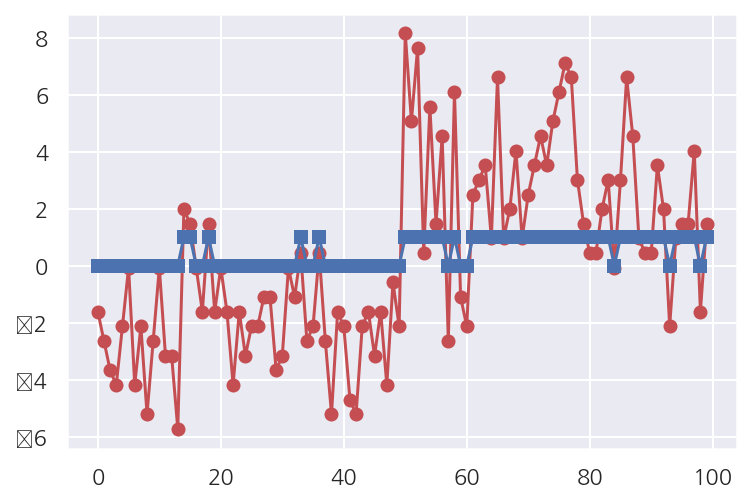

In [134]:
plt.plot(result.decision_function, 'o-', color='r')
plt.plot(result.y_hat, marker='s')
plt.show()

# 로지스틱 이진 분류 예시

- Acceptance: 0이면 불합격, 1이면 합격

- BCPM: Bio/Chem/Physics/Math 과목의 학점 평균

- GPA: 전체과목 학점 평균

- VR: MCAT Verbal reasoning 과목 점수

- PS: MCAT Physical sciences 과목 점수

- WS: MCAT Writing sample 과목 점수

- BS: MCAT Biological sciences 과목 점수

- MCAT: MCAT 촘점

- Apps: 의대 지원 횟수

In [135]:
data_med = sm.datasets.get_rdataset('MedGPA', package='Stat2Data')

In [136]:
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


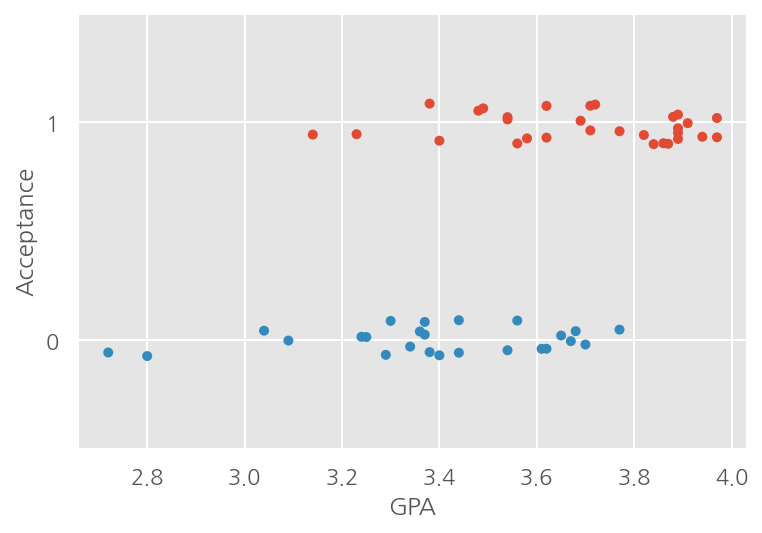

In [141]:
sns.stripplot(x='GPA', y='Acceptance', data=df_med,
             jitter=True, orient='h', order=[1,0])
plt.grid(True)
plt.style.use('ggplot')
plt.show()

In [143]:
model_med = sm.Logit.from_formula('Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps', df_med)
result_med = model_med.fit()
result_med.summary()

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:                  0.5913
Time:                        15:05:16   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.429     -1.597      0.110      -5.085       0.518
BCPM          -6.1633      6.963     -0.885      0.376     -19.811       7.484
GPA           12.3973      8.611      1.440      0.150      -4.479      29.274
VR             0.0790      0.311      0.254      0.799      -0.530       0.688
PS             1.1673      0.539      2.164      0.030       0.110       2.225
WS            -0.7784      0.396     -1.968      0.049      -1.554      -0.003
BS             1.9184      0.682      2.814      0.005       0.582       3.255
Apps           0.0512      0.147      0.348      0.728      -0.237       0.340
==============================================================================
"""

In [144]:
df_med['Prediction'] = result_med.predict(df_med)

In [146]:
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps,Prediction
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7,0.000025
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6,0.035084
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14,0.884775
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6,NaN
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1,0.100784


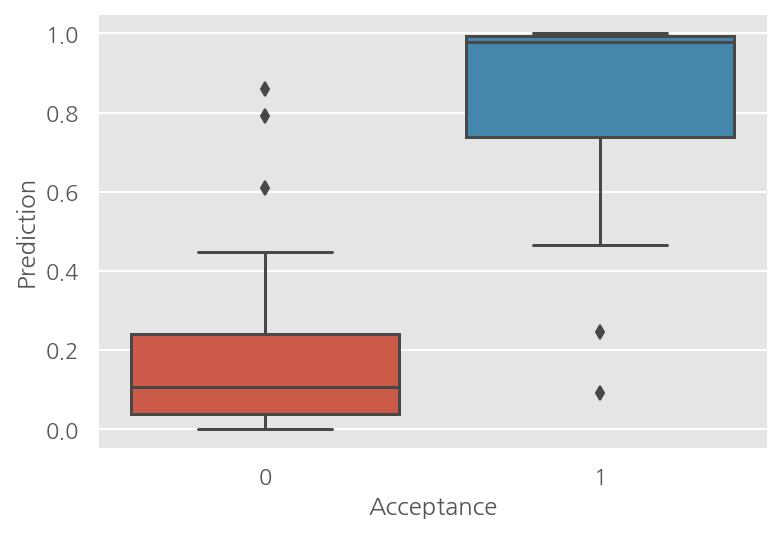

In [147]:
sns.boxplot(x='Acceptance', y='Prediction', data=df_med)
plt.show()

In [148]:
model_med = sm.Logit.from_formula('Acceptance ~ PS +BS', df_med)
result_med = model_med.fit()
result_med.summary()

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:                  0.3315
Time:                        15:08:53   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.316      1.518      0.129      -0.140       1.099
BS             1.1464      0.387      2.959      0.003       0.387       1.906
==============================================================================
"""

## 연습문제2

In [167]:
from sklearn.datasets import load_iris
iris = load_iris()
y = pd.Series(iris.target)
X0 = pd.DataFrame(iris.data, columns=iris.feature_names)[y.isin([1,2])]
y = y[y.isin([1,2])] - 1

In [169]:
X = sm.add_constant(X0, has_constant='add')
model = sm.Logit(y, X)
logit_res = model.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:                  0.9142
Time:                        15:25:23   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal length (cm)    -2.4652      2.394     -1.030      0.303      -7.158       2.228
sepal width (cm)     -6.6809      4.480     -1.491      0.136     -15.461       2.099
petal length (cm)     9.4294      4.737      1.990      0.047       0.145      18.714
petal width (cm)     18.2861      9.743      1.877      0.061      -0.809      37.381
=====================================================================================

Possibly complete quasi-separation: A fraction 0.60 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [174]:
y_pred = logit_res.predict(X) >= 0.5
y_pred

50     False
51     False
52     False
53     False
54     False
       ...  
145     True
146     True
147     True
148     True
149     True
Length: 100, dtype: bool

In [175]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y, y_pred)

array([[49,  1],
       [ 1, 49]], dtype=int64)

In [176]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



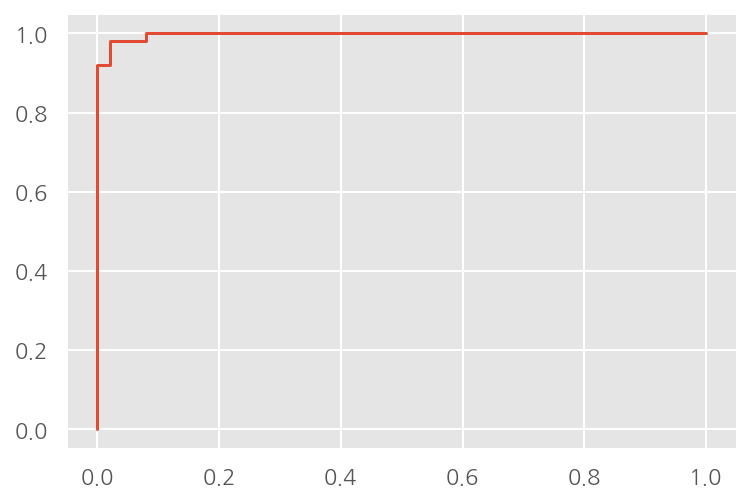

In [183]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)
plt.plot(fpr, tpr)

In [184]:
auc(fpr, tpr)

0.9972000000000001

# 로지스틱 회귀를 사용한 회귀분석

- 종속변수 y가 0부터 1까지 막혀있으면 회귀분석으로 사용 가능
    - 막혀있지 않아도 min과 max 사용해서 스케일링하면 됨

- education: 교육 기간

- sex: 성별

- agree: 찬성 인원

- disagree: 반대 인원

- ratio: 찬성 비율

In [188]:
data_wrole = sm.datasets.get_rdataset('womensrole',package='HSAUR')

In [189]:
df_wrole = data_wrole.data
df_wrole['ratio'] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


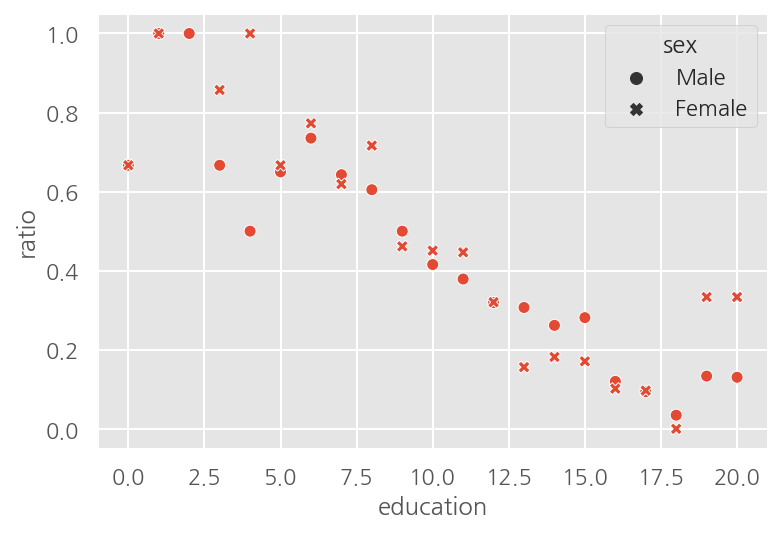

In [196]:
sns.scatterplot(x='education', y='ratio', style= 'sex',data=df_wrole)
plt.grid(True)
plt.show()

In [197]:
model = sm.Logit.from_formula('ratio ~ education + sex', df_wrole)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:                  0.3435
Time:                        15:45:24   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968      0.736     -0.267      0.789      -1.640       1.247
education      -0.2127      0.071     -2.987      0.003      -0.352      -0.073
===============================================================================
"""

In [198]:
model = sm.Logit.from_formula('ratio ~ education ', df_wrole)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:                  0.3422
Time:                        15:45:47   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.071     -2.983      0.003      -0.351      -0.073
==============================================================================
"""

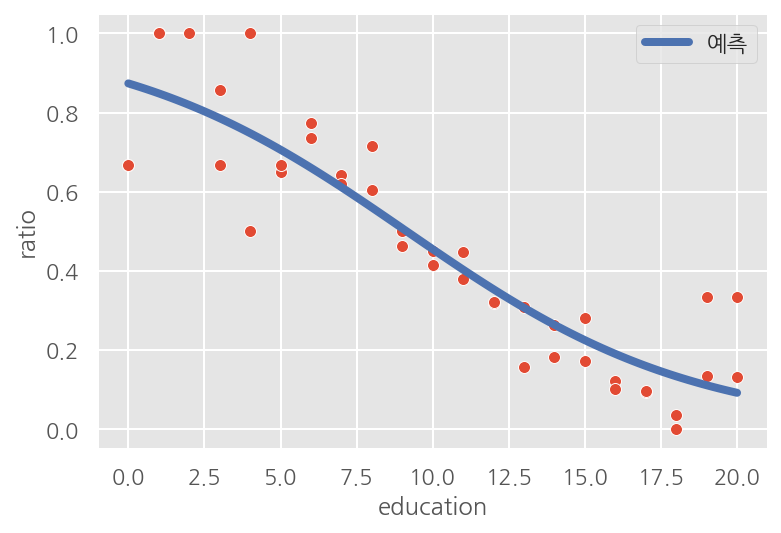

In [206]:
sns.scatterplot(x='education',y='ratio',data=df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.Series(xx, name='education')
plt.plot(xx, result.predict(df_wrole_p), 'b-', lw=4, label='예측')
plt.legend()
plt.show()